# BASIC IMAGE CLASSIFICATION WITH TENSORFLOW

Understand the problem statement

Understand the dataset

Encode the labels

Understand neural networks

Preprocess image examples

Create a neural network model

Train the model to fit the dataset

Evaluate the model

Visualize the predictions

## Understand the problem statement

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](1_1.png)

## Import Liabraries

In [26]:
import tensorflow as tf
import logging
import matplotlib.pyplot as plt
import numpy as np

logging.getLogger("tensorflow").setLevel(logging.ERROR)

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.11.1


## Understand the dataset


### Import MNIST

In [7]:

from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### Shapes of Imported Arrays

In [13]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


### Plot an Image Example

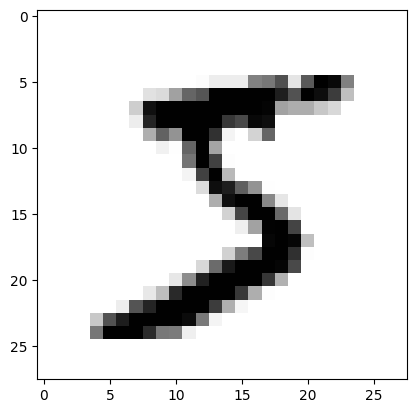

In [18]:
%matplotlib inline

plt.imshow(x_train[0],cmap='binary')
plt.show()

### Display Labels

In [19]:
y_train[0]

5

In [20]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## Encode the labels

After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [21]:
from tensorflow.keras.utils import to_categorical

y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

### Validated Shapes

In [24]:
print("y_train shape is : ",y_train_encoded.shape)
print("y_test shape is : ", y_test_encoded.shape)


y_train shape is :  (60000, 10)
y_test shape is :  (10000, 10)


### Display Encoded Labels

In [25]:
print(y_train_encoded[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Preprocessing the Examples


### Unrolling N-dimensional Arrays to Vectors

In [31]:
x_train_reshape=np.reshape(x_train,(60000,784))
x_test_reshape=np.reshape(x_test,(10000,784))

print(x_train_reshape.shape)
print(x_test_reshape.shape)

(60000, 784)
(10000, 784)


### Display Pixel Values

In [33]:
print(x_train_reshape[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

### Data Normalization

In [36]:
x_mean=np.mean(x_train_reshape)
x_std=np.std(x_train_reshape)

epsilon=1e-10

x_train_norm=(x_train_reshape-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshape-x_mean)/(x_std+epsilon)


### Display Normalized Pixel Values

In [39]:
print(x_train_norm[0])

[-0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0.42407389
 -0.42407389 -0.42407389 -0.42407389 -0.42407389 -0

## Creating a Model


### Creating the Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')])


### Compiling the Model

In [45]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Training the Model

### Training the Model

In [46]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3750 - accuracy: 0.8896
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1818 - accuracy: 0.9472
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1383 - accuracy: 0.9598


### Evaluating the Model

In [47]:
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)

313/313 [==============================] - 1s 1ms/step - loss: 0.1273 - accuracy: 0.9620


## Predictions



### Predictions on Test Set

In [49]:
predict_model=model.predict(x_test_norm)
predict_model.shape

313/313 [==============================] - 0s 1ms/step


(10000, 10)

### Plotting the Results

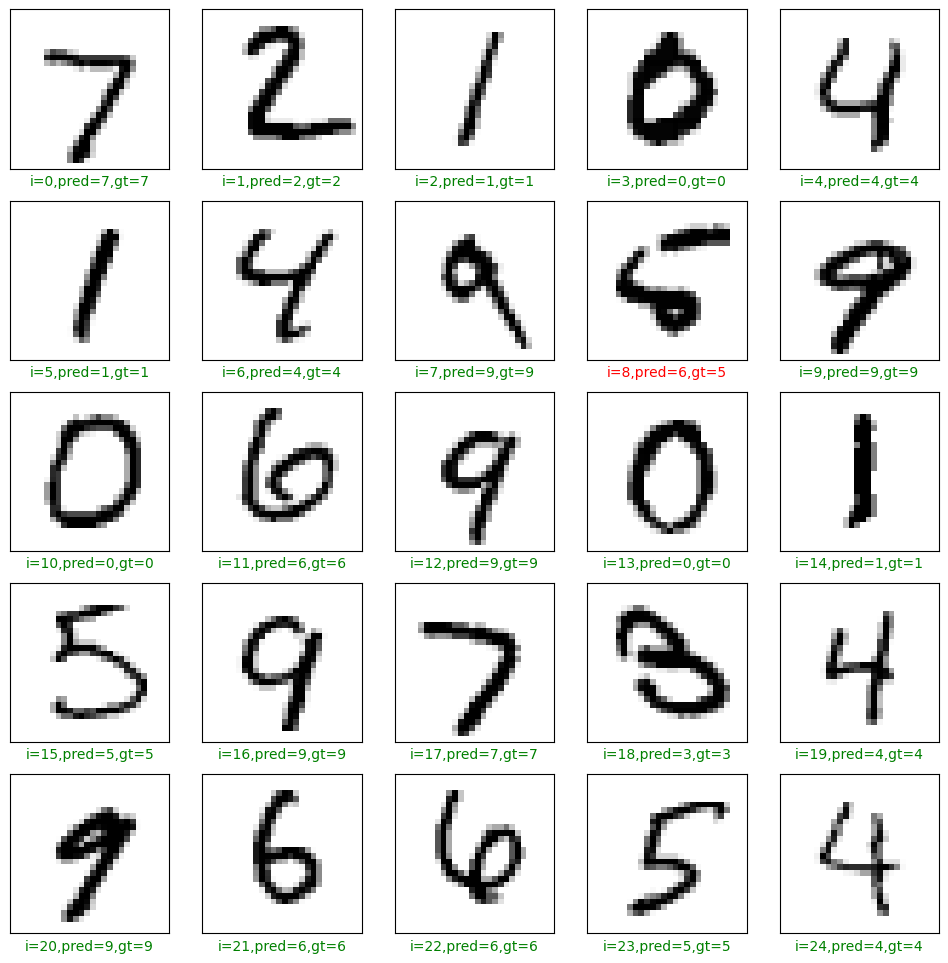

In [56]:
plt.figure(figsize=(12,12))

start_index=0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred=np.argmax(predict_model[start_index+i])
    gt=y_test[start_index+i]

    col='g'

    if pred!=gt:
        col='r'

    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')

plt.show()